# PA 5

This is the main of my program, I decided to do it here for visualization purposes. Author: Lorenzo Beltrame

This is just the main and serves as the report of my work. I fixed a seed, therefore the results are reproducible. The functions that I call are stored in different python files located in the submission folder.

In [1]:
# custom libs
from Task_2_functions import initialize_data
from Task_2_functions import plot_image
from Task_2_functions import plot_gallery
from Task_2_functions import my_custom_pca
from Task_2_functions import encode
from Task_2_functions import decode
from Task_2_functions import centre_data

# standard libs
from matplotlib.pyplot import plot
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
import pickle
import os.path



# Task 2.1: data exploration

There are 34 different people in the dataset's pictures
There are 2370 different pictures of shape [62, 47]
I visualize ten different pictures presented in the dataset:


<Figure size 720x864 with 0 Axes>

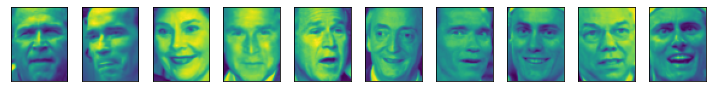


The first ten pictures are associated with:
8
4
21
25
22
5
7
9
6


In [2]:
# initialize data
X_train, X_test, y_train, y_test, X = initialize_data()

We can clearly notice that they are all faces of different people.

# Task 2.2: my custom PCA

I train my PCA for the requested number of principal components.

The PCA consists of three attributes:

- fit: Performs the fit to compute the principal components. In fit I: I center each column, then compute the covariance matrix, compute eigenvectors and eigenvalues of the covariance matrix, sort the eigenvalues from highest to lowest, save the computed principal components and choose K eigenvectors to get W, where K is given.

- transform: dot multiply W and X to get the projections of the design data onto the dataset.

- reconstruct_images_vectors: reconstruct images from the projection onto the principal components

I used all the dataset to do the principal component analysis and not only the train or the test dataset alone.

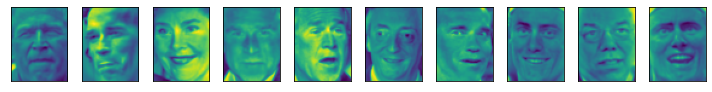

In [3]:
# plot the first then vanilla images 
X_centered = centre_data(X)
plot_gallery(X.T, 10)

In [4]:
#number_PC = [5, 10, 20, 40, 80, 160, 320, 640]
## convenience variables
#projections = []
#reconstructions = []
#cache_pca = []
#
## initialize the scaler
#my_scaler = MinMaxScaler()
#
## initialize the logistic classifier
## elastic net is a more penalizing loss function!
#clf = LogisticRegression(max_iter=1000) 
#
#for j in number_PC:
#    # print the number of PC
#    print("The number of PC is: {}".format(j))
#    
#    # initialize
#    my_pca = my_custom_pca()
#    # fit
#    my_pca.fit(X, j)
#    # visualize the first 5 principal components
#    plot_gallery(my_pca.principal_components, num=5)
#    # trasform my data in lower dimensional data
#    projections.append(my_pca.transform(X).T)
#    # reconstruct the projections
#    reconstructions.append(my_pca.reconstruct_images_vectors())
#    
#    # visualize the first 10 recostructed images
#    # convenience
#    conv = 0
#    plot_gallery(reconstructions[conv], num=10)
#    
#    
#    # scale the projections
#    my_scaler.fit(projections[conv])
#    # create the projection of each train/test set with the PCA fitted over all the data
#    train_proj = my_pca.transform(X_train).T
#    test_proj = my_pca.transform(X_test).T
#    
#    # fit
#    clf.fit(train_proj, y_train)
#    # predict
#    predictions_test = clf.predict(test_proj)
#    predictions_train = clf.predict(train_proj)
#    # accuracy metric
#    print("The accuracy score fot the training is: {}".format(accuracy_score(predictions_train, y_train)))
#    print("The accuracy score fot the test is: {}".format(accuracy_score(predictions_test, y_test)))
#    
#    # cache the PCAs
#    cache_pca.append(my_pca)
#    conv += 1

# Task 2.3: Autoencoders

Notice: the standard implementation of the sklearn MLP uses the ReLU as the activation function

Since we are fitting autoencoders we want to use the largest number of samples possible, in particular we use both the train and the test df.

Notice: I saved the fitted model in order to correct the assignment quicker! To test the goodness of the model just delete the model in the submission folder!

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 40, 200, 500)


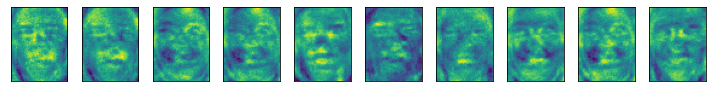

In [5]:
# set the parameters
a = 500
b = 200
d = 40
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

# I saved the trainings for convenience!
if os.path.isfile('nn_40.pkl'):
    with open('nn_40.pkl', 'rb') as f:
        nn = pickle.load(f)
else:
    # initialize my nn 
    nn = MLPRegressor(hidden_layer_sizes=(a, b, d, b, a),max_iter=2000)

    # fit my nn with all the data that I have at my disposal (both train and test)
    nn.fit(X,X)

    # save
    with open('nn_40.pkl','wb') as f:
        pickle.dump(nn,f)

# try my functions!
# centre the design matrix
X = centre_data(X)
Z_projected_40 = encode(X=X, mlp=nn)
Z_recontructed_40 = decode(Z=Z_projected_40, mlp=nn)

plot_gallery(Z_recontructed_40.T, 10)


# scale the projections
my_scaler.fit(Z_projected_40)
# create the projection of each train/test set with the PCA fitted over all the data
train_proj = my_pca.transform(X_train).T
test_proj = my_pca.transform(X_test).T

# fit
clf.fit(train_proj, y_train)
# predict
predictions_test = clf.predict(test_proj)
predictions_train = clf.predict(train_proj)
# accuracy metric
print("The accuracy score fot the training is: {}".format(accuracy_score(predictions_train, y_train)))
print("The accuracy score fot the test is: {}".format(accuracy_score(predictions_test, y_test)))

# cache the PCAs
cache_pca.append(my_pca)
conv += 1


## Change the parameters

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 80, 200, 500)


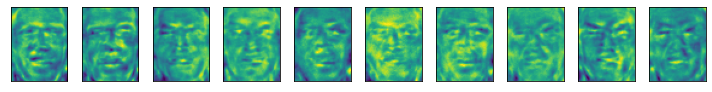

In [6]:
# set the parameters
a = 500
b = 200
d = 80
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

# I saved the trainings for convenience!
if os.path.isfile('nn_80.pkl'):
    with open('nn_80.pkl', 'rb') as f:
        nn = pickle.load(f)
else:
    # initialize my nn 
    nn = MLPRegressor(hidden_layer_sizes=(a, b, d, b, a),  max_iter=2000)

    # fit my nn with all the data that I have at my disposal (both train and test)
    nn.fit(X,X)

    # save
    with open('nn_80.pkl','wb') as f:
        pickle.dump(nn,f)


Z_projected_80 = encode(X=X, mlp=nn)
Z_recontructed_80 = decode(Z=Z_projected_80, mlp=nn)

plot_gallery(Z_recontructed_80.T, 10)